In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2022/train.csv
/kaggle/input/tabular-playground-series-may-2022/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.ticker import MaxNLocator

In [3]:
train = pd.read_csv('../input/tabular-playground-series-may-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-may-2022/test.csv')

display(train.head())
display(test.head())
# display 함수를 사용하면 여러 테이블을 띄울 수 있다.

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


# 결측치를 확인

In [4]:
train.info() # check out missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      900000 non-null  int64  
 1   f_00    900000 non-null  float64
 2   f_01    900000 non-null  float64
 3   f_02    900000 non-null  float64
 4   f_03    900000 non-null  float64
 5   f_04    900000 non-null  float64
 6   f_05    900000 non-null  float64
 7   f_06    900000 non-null  float64
 8   f_07    900000 non-null  int64  
 9   f_08    900000 non-null  int64  
 10  f_09    900000 non-null  int64  
 11  f_10    900000 non-null  int64  
 12  f_11    900000 non-null  int64  
 13  f_12    900000 non-null  int64  
 14  f_13    900000 non-null  int64  
 15  f_14    900000 non-null  int64  
 16  f_15    900000 non-null  int64  
 17  f_16    900000 non-null  int64  
 18  f_17    900000 non-null  int64  
 19  f_18    900000 non-null  int64  
 20  f_19    900000 non-null  float64
 21  f_20    90

# 타겟값 확인

타겟이 이진형이다. 51%가 0이고 49%가 1에 해당한다. 따라서 거의 균형잡혀있다.

In [5]:
(train.target.value_counts() / len(train)).round(2)

0    0.51
1    0.49
Name: target, dtype: float64

# 16 float Features
히스토그램을 확인해보면, 0을 기준으로 16 Float feature들은 정규분포를 이루고 있다. f_00부터 f_06까지는 표준편차가 1인 표준정규분포를 가지고 있고 f_019부터 f_26까지는 표준편차가 2.3과 2.5사이를 갖는다. 그리고 특징적으로 f_28은 표준편차가 거의 240에 가갑다.
Training과 Test 모두 같은 분포를 이루고 있으며 이상치는 없어 보인다.

In [6]:
float_features = [f for f in train.columns if train[f].dtype =='float64']

In [7]:
float_features

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_28']

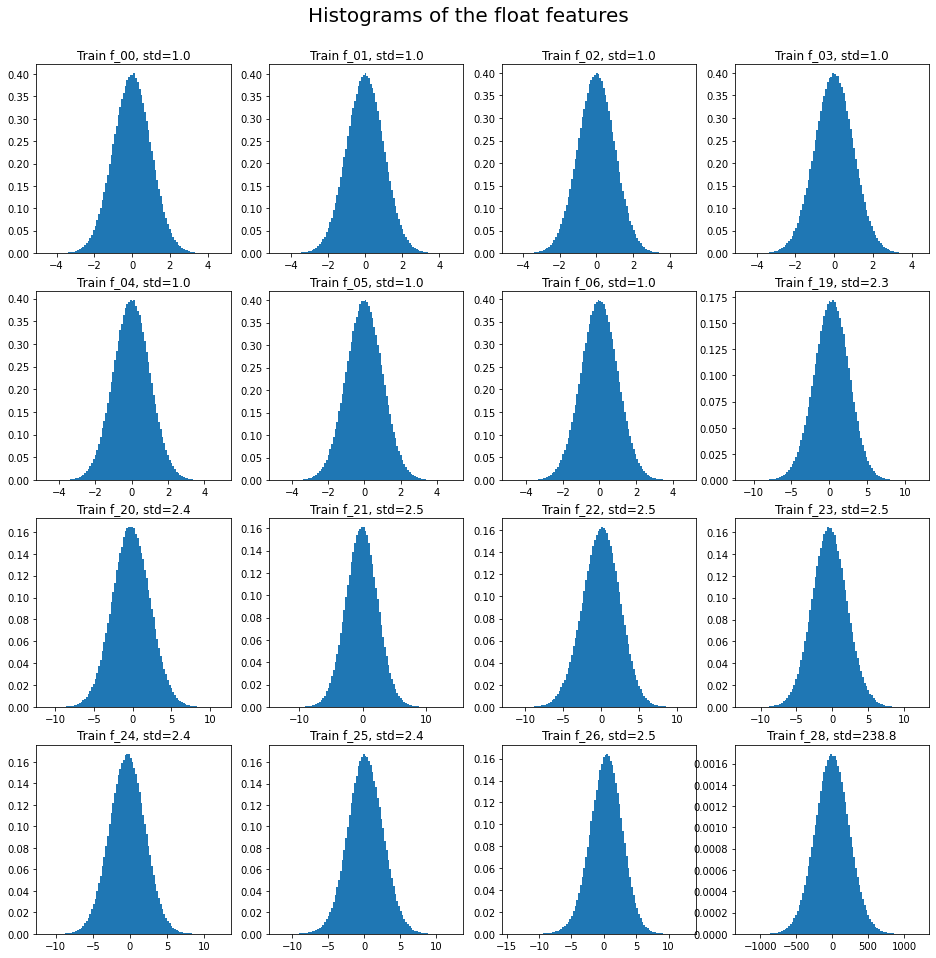

In [8]:
float_features = [f for f in train.columns if train[f].dtype == 'float64']
# train 테이블에서 피처 중 데이터 타입이 'float64'인 칼럼을 찾아 float_features 변수에 할당한다.


# Training histograms
fig, axs = plt.subplots(4, 4, figsize =(16, 16))
for f, ax in zip(float_features, axs.ravel()): # https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294
    ax.hist(train[f],density=True,  bins=100) # 히스토그램 그리기
    ax.set_title(f'Train {f}, std={train[f].std():.1f}') # 각각의 서브플롯 이름 적기
plt.suptitle('Histograms of the float features', y=0.93, fontsize=20) # 전체 그림 제목
plt.show()

상관관계 매트릭스는 아래와 같다.
1. f_00부터 f_06까지는 f_28과 어느 정도 상관관계가 있다. 한편 각각은 서로 상관관계가 없다.
2. f_19부터 f_26까지는 모두 서로 조금씩 상관관계가 있다. 
3. 타겟 피처와 강한 상관관계를 갖는 피처는 하나도 없다.

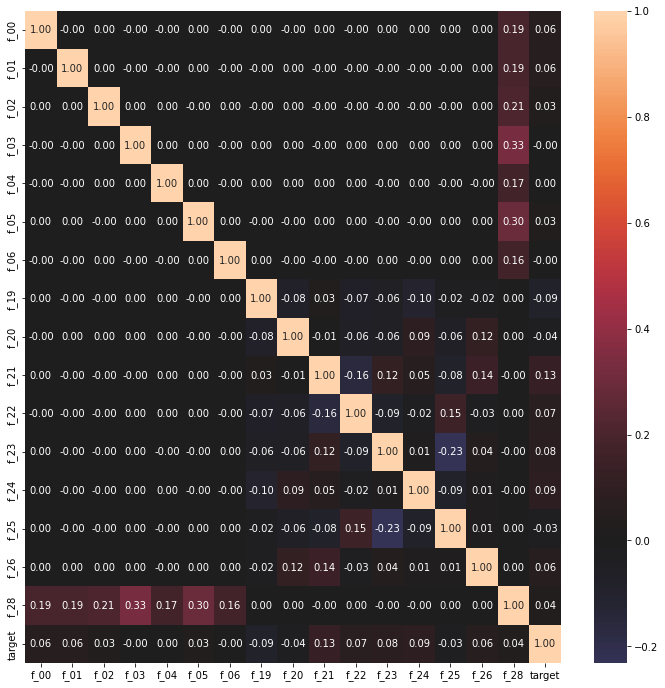

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(train[float_features + ['target']].corr(), center=0, annot=True, fmt='.2f')
plt.show()

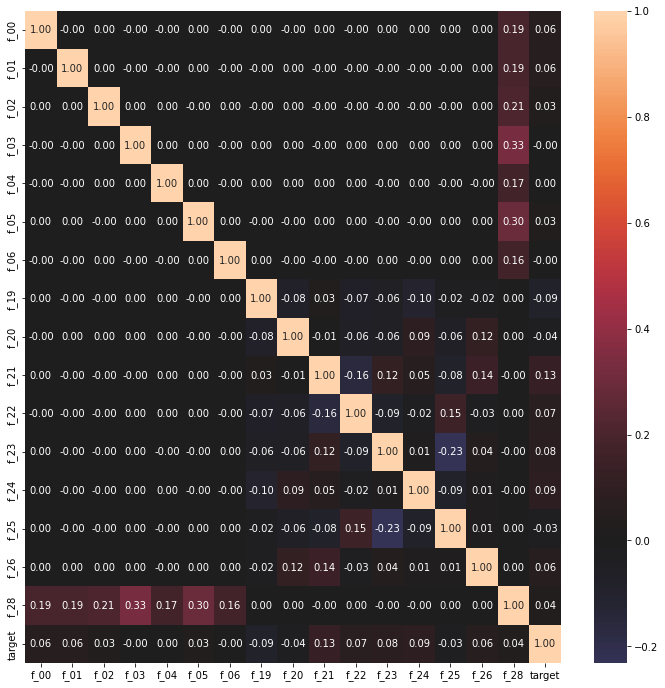

In [10]:
## 플롯 피처에 대한 상관관계 매트릭스
plt.figure(figsize=(12, 12))
sns.heatmap(train[float_features + ['target']].corr(), center=0, annot=True, fmt='.2f')
plt.show()

상관관계 매트릭스는 오직 선형 의존성만 보여줄 뿐이다. 만약 모든 피처에 대해 타겟의 확률의 이동평균을 구하면 우리는 비선형적 의존성도 보여줄 수 있을 것이다. 수평선은 아무런 상관관계가 없다는 것을 보여준다(f_03, f_04, f_07). 

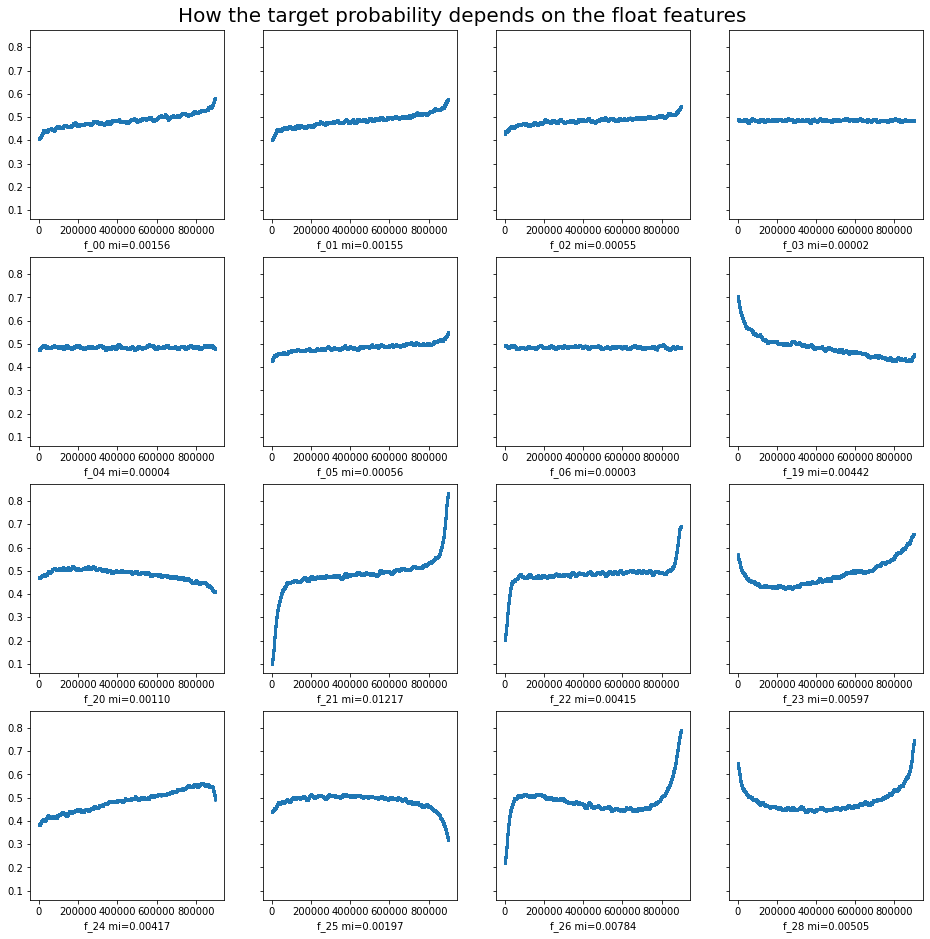

In [11]:
# plot dependence between every feature and the target
def plot_mutual_info_diagram(df, features, ncols=4, by_quantile=True, mutual_info = True, title='How the target probability depends on single features'):
    def H(p):
        '''Entropy of a binary random varibale in nat'''
        return -np.log(p) * p - np.log(1-p)*(1-p)
     # 정보량에 관한 설명 http://www.ktword.co.kr/test/view/view.php?m_temp1=3660
    nrows = (len(features) + ncols -1) // ncols # 행 개수 (몫만 구하기)
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows*4), sharey = True) # y축이 모든 하위 플롯에 공유된다. 서브 플롯에 행을 따라 공유 y 축이 있으면 첫 번째 열 서브 플롯의 y 눈금 레이블 만 만들어집니다. https://runebook.dev/ko/docs/matplotlib/_as_gen/matplotlib.pyplot.subplots
    for f, ax in zip(features, axs.ravel()):
        temp = pd.DataFrame({f: df[f].values, 'state':df.target.values})
        temp = temp.sort_values(f)
        temp.reset_index(inplace=True)
        rolling_mean = temp.state.rolling(15000, center=True, min_periods=1).mean()
        if by_quantile:
            ax.scatter(temp.index, rolling_mean, s=2)
        else:
            ax.scatter(temp[f], rolling_mean, s=2)
        if mutual_info and by_quantile:
            ax.set_xlabel(f'{f} mi={H(temp.state.mean()) - H(rolling_mean[~rolling_mean.isna()].values).mean():.5f}')
        else: ax.set_xlabel(f'{f}')
    plt.suptitle(title, y=0.90, fontsize=20) # 전체 타이틀
    plt.show()
plot_mutual_info_diagram(train, float_features, title='How the target probability depends on the float features')

# 정수형 피처
정수형 피처의 히스토그램을 보면, 처음부터 12번째 피처까지 0과 16 사이의 값을 갖는 것을 알 수 있다. 마지막 두 개의 피처들은 특이했다.
f_29는 2진형이었고 f_30은 3진형이었다

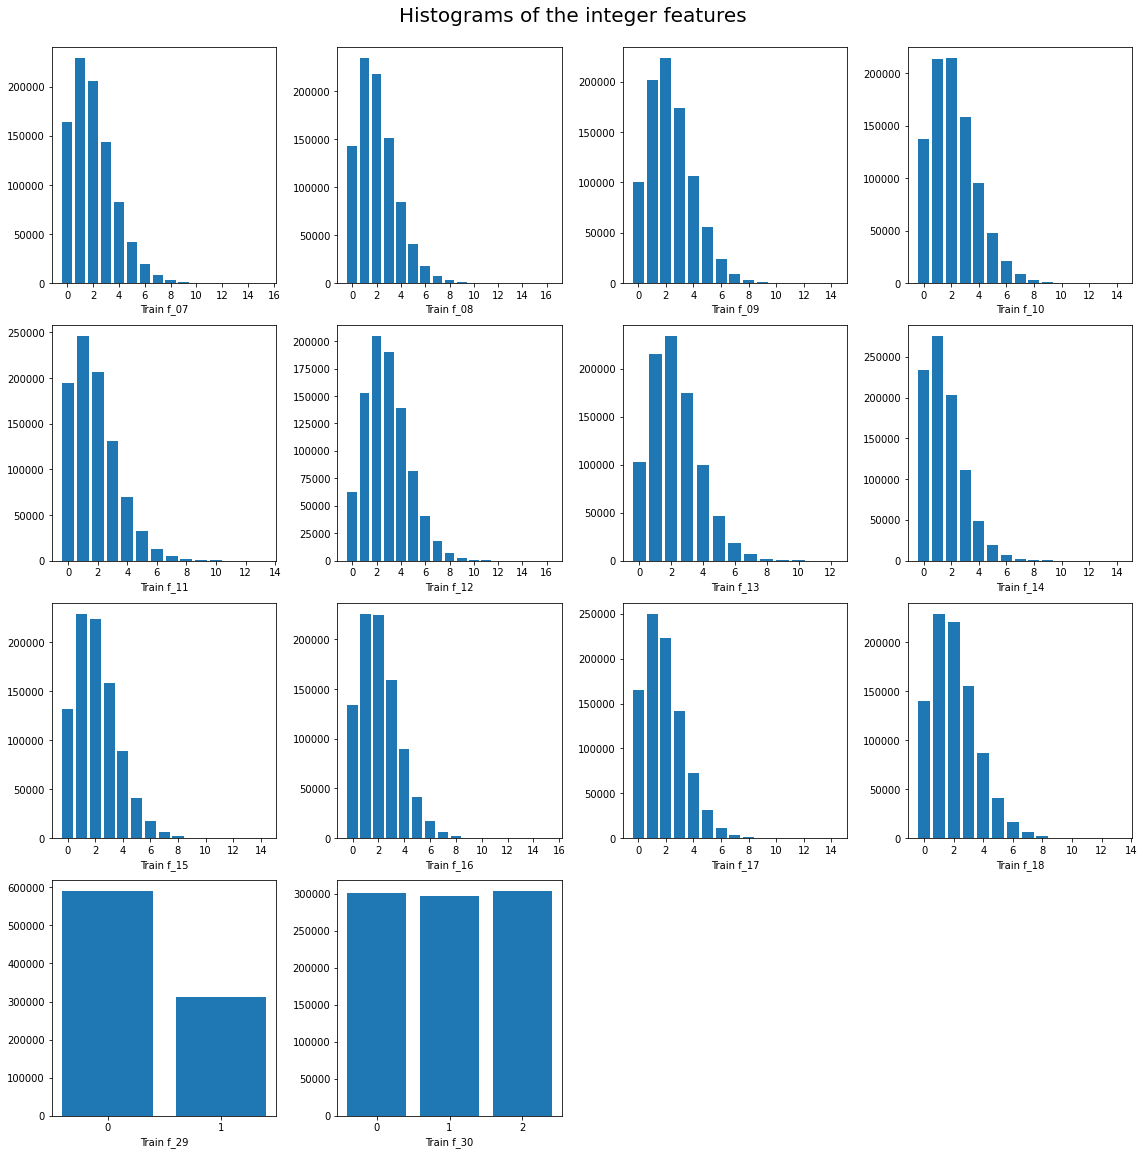

In [12]:
int_features = [f for f in test.columns if test[f].dtype=='int64' and f !='id']

# Training histograms
# fig, axs = plt.subplts(4,4, figsize=(16,16))
figure = plt.figure(figsize=(16, 16))
# for f, ax in zip(int_features, axs.ravel()):
for i, f in enumerate(int_features):
    plt.subplot(4,4, i+1)
    ax = plt.gca()
    vc = train[f].value_counts()
    ax.bar(vc.index, vc)
    # ax.hist(train[f], density=False, bins=(train[f].max()-train[f].min()+1))
    ax.set_xlabel(f'Train {f}')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # only integer labels
    plt.suptitle('Histograms of the integer features', y=1.0, fontsize=20)
figure.tight_layout(h_pad=1.0)
plt.show()

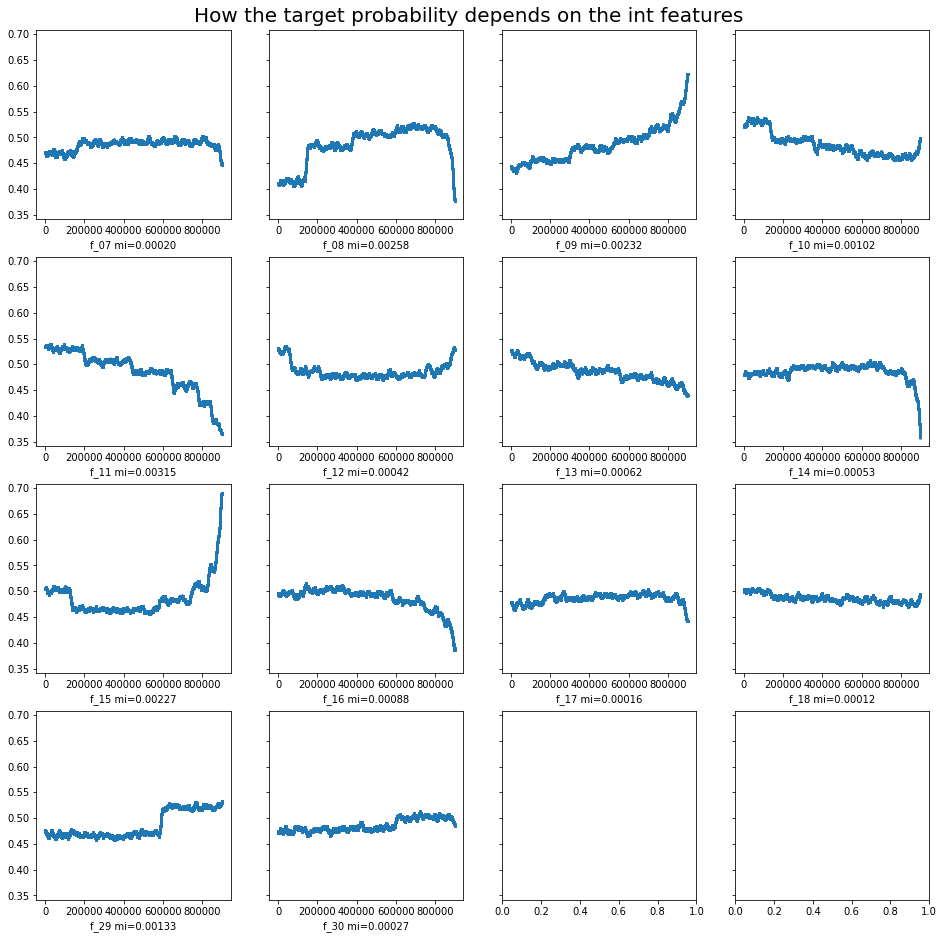

In [13]:
plot_mutual_info_diagram(train, int_features, title='How the target probability depends on the int features')

# 스트링 피처
f_27은 스트링 피처이기 때문에 그 자체로 활용할 수 없다. 어떻게 잘 활용할 수 있는지 알아보자.
먼저, 항상 그 스트링의 길이가 10인 것을 알 수 있다.

In [14]:
train.f_27.str.len().min(), 
train.f_27.str.len().max(),test.f_27.str.len().min(),test.f_27.str.len().max(),

(10, 10, 10)

In [15]:
train.f_27.value_counts()

BBBBBBCJBC    12
BCBBBBCLBC    12
BBBBBBDPCB    10
BBBBBBDKBC    10
ADBBBACQBC    10
              ..
BFAFAADTCE     1
BBBDAACOAE     1
BBABAACGBB     1
BFAABAGSDB     1
BCAACADSCE     1
Name: f_27, Length: 741354, dtype: int64

In [16]:
train.f_27

0         ABABDADBAB
1         ACACCADCEB
2         AAAEABCKAD
3         BDBBAACBCB
4         BDBCBBCHFE
             ...    
899995    BABBCBBBED
899996    BBBGBBDQBE
899997    AEBEDBBHBA
899998    ADBAAADDAE
899999    BCAACADSCE
Name: f_27, Length: 900000, dtype: object

In [17]:
train.f_27.str.get(3)

0         B
1         C
2         E
3         B
4         C
         ..
899995    B
899996    G
899997    E
899998    A
899999    A
Name: f_27, Length: 900000, dtype: object

In [18]:
tx = train.groupby(train.f_27.str.get(i))


In [19]:
for i in range(10):
    print(f'Position {i}')
    # Position 반복문을 생성
    tg = train.groupby(train.f_27.str.get(i))
    # f_27열의 i 번째 index를 가져온다.
    temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
    # 'size'와 'probability' 열을 만든다. tg의
    print(temp)
    print()

Position 0
        size  probability
f_27                     
A     451207         0.54
B     448793         0.44

Position 1
        size  probability
f_27                     
A     144762         0.58
B     245160         0.48
C     225931         0.49
D     149579         0.45
E      78807         0.43
F      35487         0.42
G      13713         0.41
H       4647         0.40
I       1361         0.40
J        410         0.38
K        113         0.39
L         25         0.28
M          3         0.67
N          2         1.00

Position 2
        size  probability
f_27                     
A     297840         0.53
B     602160         0.46

Position 3
        size  probability
f_27                     
A     160839         0.57
B     237218         0.48
C     210015         0.48
D     143633         0.45
E      81662         0.43
F      39504         0.44
G      17121         0.45
H       6473         0.47
I       2379         0.48
J        772         0.51
K        254     

In [20]:
unique_characters = train.f_27.apply(lambda s: len(set(s))).rename('unique_characters')
tg = train.groupby(unique_characters)
temp = pd.DataFrame({'size': tg.size(), 'probability': tg.target.mean().round(2)})
print(temp)

                     size  probability
unique_characters                     
1                       1         0.00
2                    1092         0.09
3                   32164         0.09
4                  211165         0.48
5                  399974         0.49
6                  220715         0.48
7                   33698         0.91
8                    1185         0.91
9                       6         1.00


In [21]:
for df in [train, test]:
    for i in range(10):
        df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
        df['unique_characters'] = df.f_27.apply(lambda s: len(set(s)))

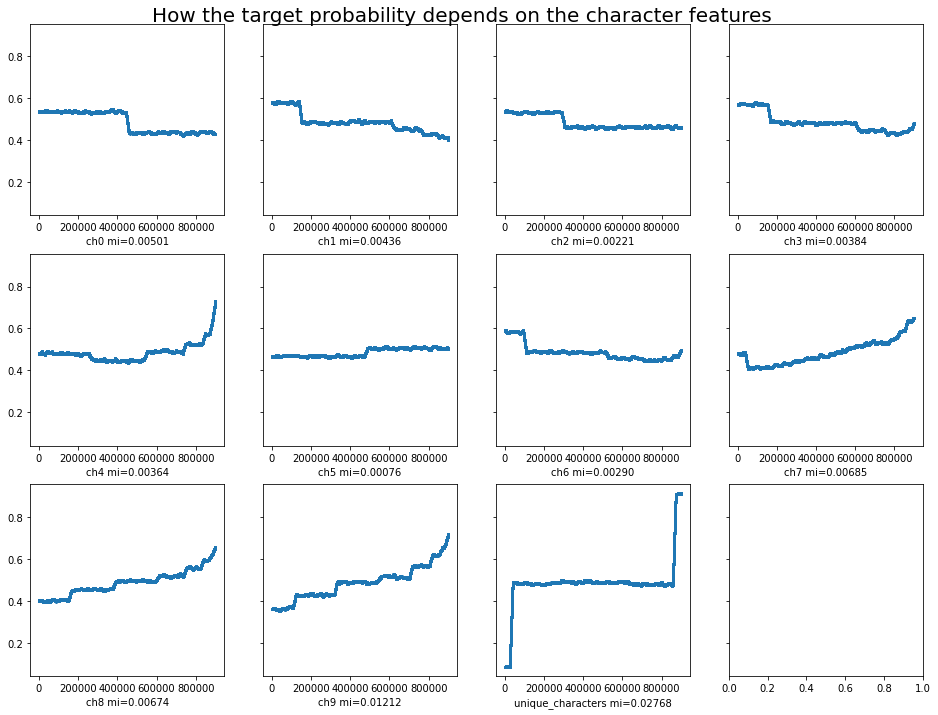

In [22]:
plot_mutual_info_diagram(train, [f for f in train.columns if f.startswith('ch')] + ['unique_characters'], title = 'How the target probability depends on the character features')

# 상위 세 가지 피처의 상호관련성
[상호관련성과 상관관계의 주제](https://www.kaggle.com/competitions/tabular-playground-series-may-2022/discussion/323766/)에서 @wti200이라는 이름의   피처 공간의 2d 투영은 서로 다른 타겟 확률로 나눠질 수 있다고 설명했다. 이러한 다이어그램에서 우리는 피처간의 상호관련성을 도출할 수 있다. 아래 세 가지의 투영은 특히 유용하다.

* f_02과 f_21
* f_05과 f_22
* f_00 + f_01과 f_26

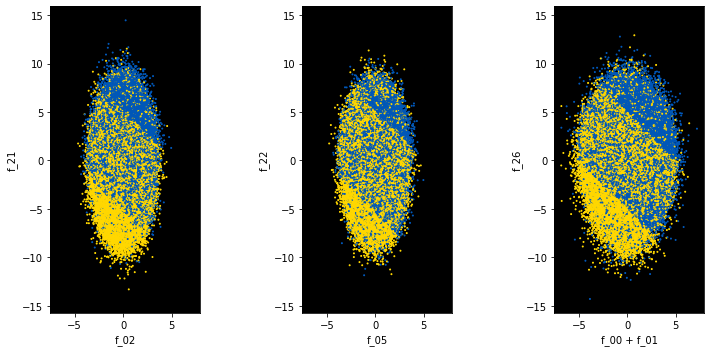

In [23]:
plt.rcParams['axes.facecolor'] = 'k' # rcParams에 관해서 https://jrc-park.tistory.com/274
plt.figure(figsize=(11,5)) # 그림 사이즈 조절
cmap = matplotlib.colors.ListedColormap(["#ffd700", "#0057b8"]) # 색상을 담을 리스트 형성
# target == 0 -> yellow ; target == 1 -> blue

ax = plt.subplot(1, 3,1) # 첫 번째 그래프, 1행 3열 중 첫번째
ax.scatter(train['f_02'], train['f_21'], s = 1, c=train.target, cmap= cmap) # 산점도, s= 마커사이즈, c = 컬러, cmap = 컬러맵 /// 스캐터 플롯에 관해서 https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
ax.set_xlabel('f_02') # x축
ax.set_ylabel('f_21') # y축
ax.set_aspect('equal') # 축에 대한 스케일링을 한다. x와 y에 관한 스케일링  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_aspect.html
ax0= ax # 이후 두 번째 그래프와 세 번째 그래프의 x축과 y축을 통일하기 위해 설정 

ax = plt.subplot(1, 3, 2, sharex=ax0, sharey = ax0) # 동일한 x축, y축 사용
ax.scatter(train['f_05'], train['f_22'], s=1, c=train.target, cmap=cmap)
ax.set_xlabel('f_05')
ax.set_ylabel('f_22')
ax.set_aspect('equal')

ax = plt.subplot(1, 3, 3, sharex=ax0, sharey = ax0)
ax.scatter(train['f_00'] + train['f_01'], train['f_26'], s = 1, c=train.target, cmap=cmap)
ax.set_xlabel('f_00 + f_01')
ax.set_ylabel('f_26')
ax.set_aspect('equal')

plt.tight_layout(w_pad = 1.0) # Figure 안에 Subplot 이 적절하게 배치되도록 설정한다.  https://matplotlib.org/stable/api/tight_layout_api.html
plt.savefig('three-projections.png')
plt.show()
plt.rcParams['axes.facecolor'] = '#0057b8' # blue